# Deep Learning Lab Experiment- 1

# Consider a "semi-arid soil types" dataset based on various soil properties. The dataset includes features such as soil texture, pH, moisture content, organic matter, and more. The objective is to use a deep neural network to predict soil types (e.g., sandy, loamy, clayey) based on these features. Design a simple deep learning sequential model with the following specifications:

## Two hidden layers with 64 and 32 neurons, respectively 
## ReLU activation function 
## A dropout rate of 30% to avoid overfitting 
## Classification into three categories (or more if needed) for soil classification 

In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic features
soil_texture = np.random.uniform(0, 1, num_samples)  # Ratio of sand, silt, and clay
pH = np.random.uniform(4.5, 9.0, num_samples)  # Soil pH levels
moisture_content = np.random.uniform(5, 50, num_samples)  # Percentage moisture
organic_matter = np.random.uniform(1, 10, num_samples)  # Organic matter in %
bulk_density = np.random.uniform(1.1, 1.6, num_samples)  # Soil bulk density in g/cm^3

# Simulate soil types based on feature patterns
# (These are arbitrary rules to assign soil types based on generated features)
soil_types = []
for i in range(num_samples):
    if soil_texture[i] > 0.7 and pH[i] > 6.5 and moisture_content[i] < 15:
        soil_types.append("Sandy")
    elif organic_matter[i] > 5 and moisture_content[i] > 30:
        soil_types.append("Loamy")
    else:
        soil_types.append("Clayey")

# Create a DataFrame
data = pd.DataFrame({
    "Soil_Texture": soil_texture,
    "pH": pH,
    "Moisture_Content": moisture_content,
    "Organic_Matter": organic_matter,
    "Bulk_Density": bulk_density,
    "Soil_Type": soil_types
})

# Save the dataset to a CSV file
data.to_csv("synthetic_soil_dataset.csv", index=False)

print("Synthetic dataset created and saved as 'synthetic_soil_dataset.csv'.")

Synthetic dataset created and saved as 'synthetic_soil_dataset.csv'.


In [11]:
df = pd.read_csv('synthetic_soil_dataset.csv')

In [61]:
df.isnull().sum()

Soil_Texture        0
pH                  0
Moisture_Content    0
Organic_Matter      0
Bulk_Density        0
Soil_Type           0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Texture      1000 non-null   float64
 1   pH                1000 non-null   float64
 2   Moisture_Content  1000 non-null   float64
 3   Organic_Matter    1000 non-null   float64
 4   Bulk_Density      1000 non-null   float64
 5   Soil_Type         1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [13]:
df.head()

,Soil_Texture,pH,Moisture_Content,Organic_Matter,Bulk_Density,Soil_Type
0,0.374540,5.333098,16.776756,7.054327,1.385998,Clayey
1,0.950714,6.938554,16.114046,8.170133,1.502716,Clayey
2,0.731994,8.428256,45.781456,3.254211,1.480080,Clayey
3,0.598658,7.795012,16.229579,6.623867,1.176950,Clayey
4,0.156019,8.129525,17.237738,6.145714,1.174625,Clayey


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("synthetic_soil_dataset.csv")

# 1. Handle Missing Data
# Check for missing values
data.isnull().sum()

# Impute missing values (if any) with mean for numerical features and mode for categorical features
numerical_features = ["Soil_Texture", "pH", "Moisture_Content", "Organic_Matter", "Bulk_Density"]
categorical_features = ["Soil_Type"]

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

data[numerical_features] = num_imputer.fit_transform(data[numerical_features])
data[categorical_features] = cat_imputer.fit_transform(data[categorical_features])

# 2. Separate Features (Inputs) and Labels (Outputs)
X = data[numerical_features]
y = data["Soil_Type"]

# Encode Categorical Features
# Apply one-hot encoding for the "Soil_Type" column
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))


# 4. Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final Processed Data
print("Processed features shape:", X_scaled.shape)
print("Processed labels shape:", y_encoded.shape)


Processed features shape: (1000, 5)
Processed labels shape: (1000, 3)


In [19]:
from sklearn.model_selection import train_test_split

# Assuming `X_scaled` and `y_encoded` are preprocessed features and labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 800
Testing set size: 200


In [ ]:
pip install tensorflow

In [ ]:
 # Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a default learning rate of 0.001
    loss='sparse_categorical_crossentropy',  # Loss function for integer-labeled multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

print("Model compiled successfully!")

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [47]:
# Extract training and validation metrics
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
training_loss = history.history['loss'][-1]
validation_loss = history.history['val_loss'][-1]

print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Training Loss:", training_loss)
print("Validation Loss:", validation_loss)

Training Accuracy: 0.9700000286102295
Validation Accuracy: 0.9399999976158142
Training Loss: 0.10229777544736862
Validation Loss: 0.11761154234409332


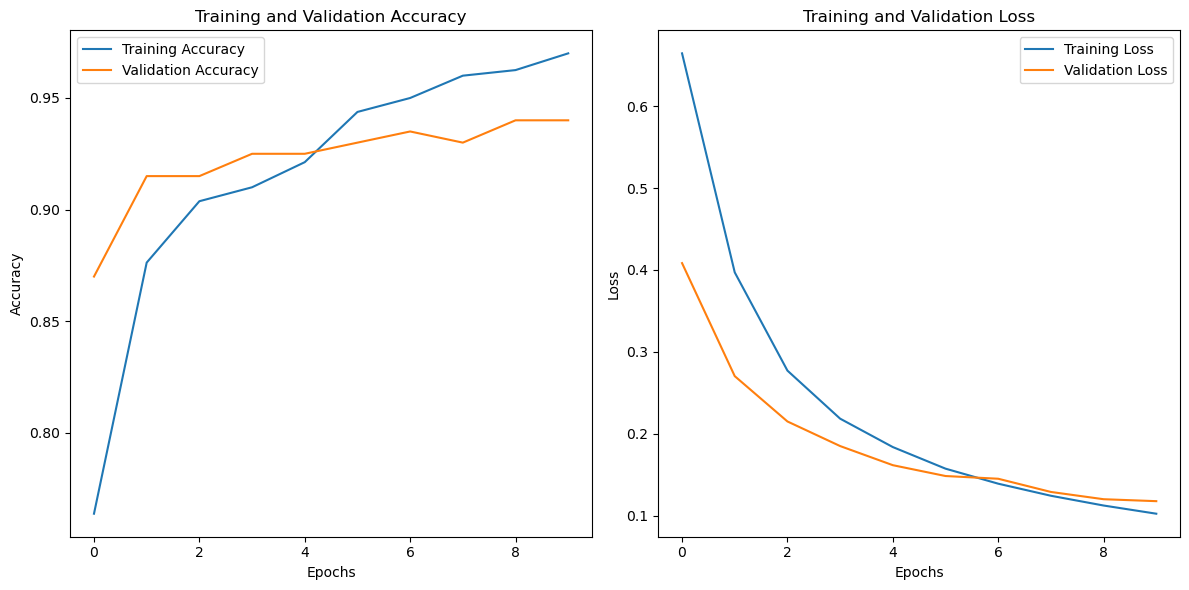

In [49]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [51]:
# Save the entire model to a file
model.save("soil_classification_model.h5")
print("Model saved as 'soil_classification_model.h5'")

Model saved as 'soil_classification_model.h5'


In [55]:
from tensorflow.keras.models import load_model

# Load the model from the file
loaded_model = load_model("soil_classification_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


In [57]:
# Evaluate the loaded model on the test set
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Accuracy: {accuracy:.2f}")

# Make predictions with the loaded model
new_soil_data = np.array([[2, 6.5, 15.0, 3.5, 1.2]])  # Example new data
new_soil_data_scaled = scaler.transform(new_soil_data)
predictions = loaded_model.predict(new_soil_data_scaled)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted Soil Type:", predicted_class)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9370 - loss: 0.1224 
Loaded Model Accuracy: 0.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predicted Soil Type: [0]


In [59]:
import os

# Get the file size of the saved model
model_file = "soil_classification_model.h5"

# Check if the file exists
if os.path.exists(model_file):
    model_size = os.path.getsize(model_file) / (1024 * 1024)  # Convert bytes to MB
    print(f"Model size: {model_size:.2f} MB")
else:
    print(f"Model file '{model_file}' not found. Please save the model first.")

Model size: 0.13 MB
